# Import Libraries

In [1]:
# Pandas and Visualization
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import warnings
# Sklearn
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# Load Train and Test Datasets

In [2]:
dataset_path_input = './Data/'
train_data = pd.read_csv(os.path.join(dataset_path_input, 'train.csv'))
test_data = pd.read_csv(os.path.join(dataset_path_input, 'test.csv'))

print("The shape of the training dataset is {}.\n".format(train_data.shape))
print("The shape of the testing dataset is {}.\n".format(test_data.shape))

The shape of the training dataset is (891, 12).

The shape of the testing dataset is (418, 11).



In [3]:
warnings.filterwarnings("ignore")

# EDA

**First few row of training dataset**

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Drop PassengerId column**

In [5]:
train_data.drop(columns='PassengerId', axis=1, inplace=True)

**What about descriptive statistics?**

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**What about info?**

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


**What about Nulls?**

In [8]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
round((train_data.isnull().sum() / len(train_data)) * 100, 2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

**Numerical and Categorical Columns**

In [10]:
# Select numerical columns
num_cols = [cname for cname in train_data.columns 
            if train_data[cname].dtype in ['int64', 'float64']]
num_cols.remove('Pclass')

cat_cols = list(set(train_data.columns) - set(num_cols) - {'Ticket', 'Name', 'Cabin'})
num_cols.remove('Survived')

print("Numerical Columns:", num_cols, '', sep='\n')
print("Categorical Columns:", cat_cols, '', sep='\n')

Numerical Columns:
['Age', 'SibSp', 'Parch', 'Fare']

Categorical Columns:
['Pclass', 'Sex', 'Embarked']



**Analysis of categorical columns**

In [11]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

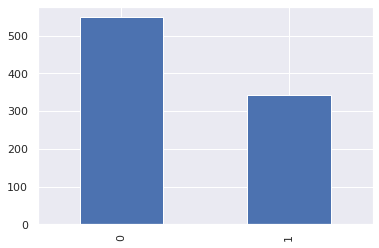

In [12]:
train_data['Survived'].value_counts().plot(kind='bar')

In [13]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

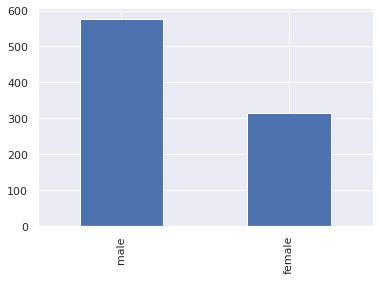

In [14]:
train_data['Sex'].value_counts().plot(kind='bar')

In [15]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

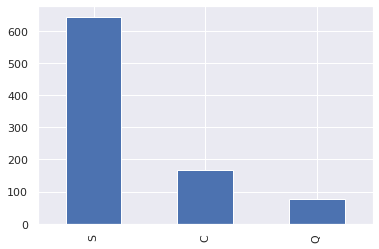

In [16]:
train_data['Embarked'].value_counts().plot(kind='bar')

In [17]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

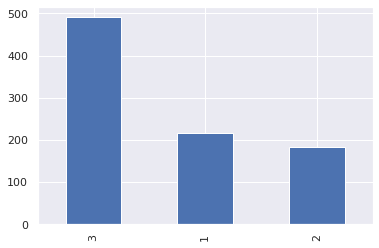

In [18]:
train_data['Pclass'].value_counts().plot(kind='bar')

**Analysis other columns**

In [19]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:>

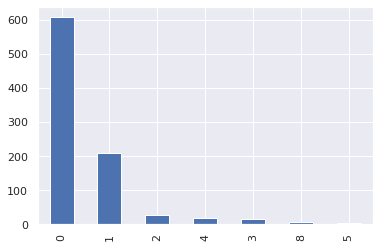

In [20]:
train_data['SibSp'].value_counts().plot(kind='bar')

In [21]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:>

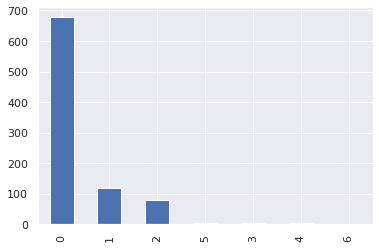

In [22]:
train_data['Parch'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

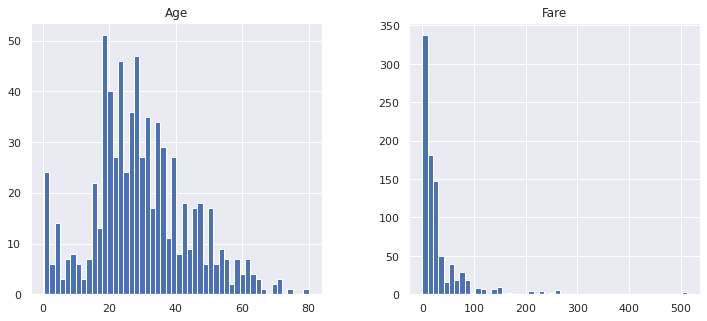

In [23]:
train_data[['Age', 'Fare']].hist(bins=50, figsize=(12,5))

**Outliers Detection**

<AxesSubplot:>

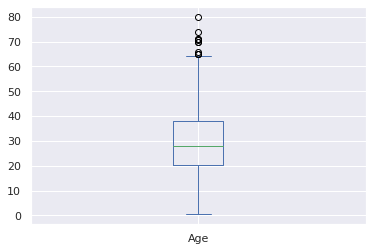

In [24]:
train_data['Age'].plot(kind='box')

## More EDA

**Linear Correlation**

In [25]:
corr_matrix = train_data.corr()

In [26]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

**Percentage of survived Women**

In [27]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


<AxesSubplot:>

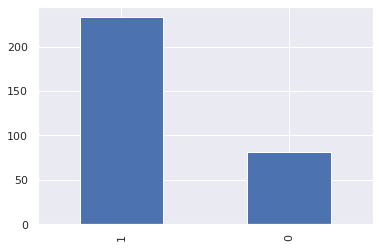

In [28]:
train_data.loc[train_data.Sex == 'female']["Survived"].value_counts().plot(kind='bar')

**Percentage of survived Men**

In [29]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


<AxesSubplot:>

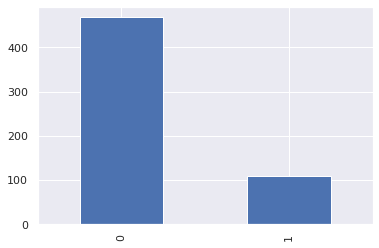

In [30]:
train_data.loc[train_data.Sex == 'male']["Survived"].value_counts().plot(kind='bar')

## Feature Engineering 
**1-Handle missing values (Age, Embarked) columns**

**2-Convert categorical columns (Sex, Embarked, Pclass) to one_hot_encoder**

**3-Add new features**

**4- Use StandardScaler**

In [31]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index = X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [32]:
class AddColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        # print(X.shape)
        AgeBucket = X[:, Age_index] // 15 * 15
        FamilySize = X[:, SibSp_index] + X[:, Parch_index]
        FarePerPerson = X[:, Fare_index] / (FamilySize + 1)
        
        return np.c_[AgeBucket, FamilySize, FarePerPerson]

In [33]:
# num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
Age_index, SibSp_index, Parch_index, Fare_index = 0, 1, 2, 3  

In [34]:
num_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy="median")),
                         ('add_cols', AddColumns()),
                         ('std_scaler', StandardScaler())])

cat_pipeline = Pipeline([('cat_imputer', MostFrequentImputer()),
                         ('one_hot', OneHotEncoder())])

In [35]:
preprocessor_pipeline = ColumnTransformer([("num_transformer", num_pipeline, num_cols),
                                         ("cat_transformer", cat_pipeline, cat_cols)])

## Model Selection


**SVM Classifier**

In [36]:
X_train = preprocessor_pipeline.fit_transform(train_data)

In [37]:
y_train = train_data["Survived"]

In [38]:
svm_clf = SVC(gamma="scale")

In [39]:
full_pipeline =  Pipeline([('preprocessor', preprocessor_pipeline),
                           ('model', svm_clf)])

In [40]:
svm_scores = cross_val_score(full_pipeline, train_data, y_train, cv=10)
print('SVC score:', svm_scores.mean())

SVC score: 0.8305243445692883


**RandomForest Classifier**

In [41]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
full_pipeline = Pipeline([('preprocessor', preprocessor_pipeline),
                           ('model', forest_clf)])

In [43]:
forest_scores = cross_val_score(full_pipeline, train_data, y_train, cv=10)
print('RandomForest score:', forest_scores.mean())

RandomForest score: 0.8036079900124843


**RandomForest Classifier VS. SVM Classifier**

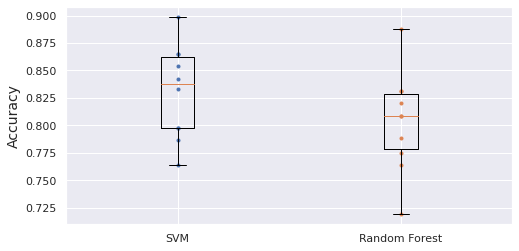

In [44]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

## Split Data using StratifiedKFold

**RandomForest Classifier**

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
rf_scores = []

skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(forest_clf)

    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    
    X_valid_fold = X_train[test_index]
    y_valid_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_valid_fold)
    
    n_correct = sum(y_pred == y_valid_fold)
    rf_scores.append((n_correct / len(y_pred)))

In [46]:
print('RandomForest score:', np.mean(rf_scores))

RandomForest score: 0.8092009987515605


**SVM Classifier**

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
sv_scores = []

skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(svm_clf)

    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    
    X_valid_fold = X_train[test_index]
    y_valid_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_valid_fold)
    
    n_correct = sum(y_pred == y_valid_fold)
    sv_scores.append((n_correct / len(y_pred)))

In [48]:
print('SVC score:', np.mean(sv_scores))

SVC score: 0.8304494382022473


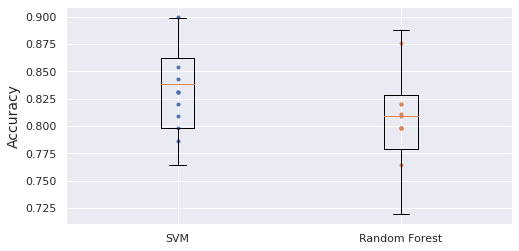

In [49]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, sv_scores, ".")
plt.plot([2]*10, rf_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

## hyperparameters Tuning using cross validation and grid search


**RandomForest Classifier**

In [50]:
param_grid = [{'n_estimators': [50, 80, 100, 120, 150], 'max_depth': [2, 4, 6, 8, 10]}]
forest_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_clf, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'n_estimators': [50, 80, 100, 120, 150]}],
             return_train_score=True)

In [51]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=150, random_state=42)

In [52]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7923470661672909 {'max_depth': 2, 'n_estimators': 50}
0.787852684144819 {'max_depth': 2, 'n_estimators': 80}
0.788976279650437 {'max_depth': 2, 'n_estimators': 100}
0.7912359550561797 {'max_depth': 2, 'n_estimators': 120}
0.7923595505617977 {'max_depth': 2, 'n_estimators': 150}
0.8215480649188514 {'max_depth': 4, 'n_estimators': 50}
0.8170536828963794 {'max_depth': 4, 'n_estimators': 80}
0.8170536828963796 {'max_depth': 4, 'n_estimators': 100}
0.8159300873907614 {'max_depth': 4, 'n_estimators': 120}
0.8159300873907614 {'max_depth': 4, 'n_estimators': 150}
0.8283395755305867 {'max_depth': 6, 'n_estimators': 50}
0.828314606741573 {'max_depth': 6, 'n_estimators': 80}
0.8316978776529338 {'max_depth': 6, 'n_estimators': 100}
0.8271910112359551 {'max_depth': 6, 'n_estimators': 120}
0.832796504369538 {'max_depth': 6, 'n_estimators': 150}
0.8226966292134831 {'max_depth': 8, 'n_estimators': 50}
0.8237952559300874 {'max_depth': 8, 'n_estimators': 80}
0.8260549313358302 {'max_depth': 8, 'n_esti

**SVM Classifier (this code take much of time)**

In [53]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_clf = SVC()

grid_search = GridSearchCV(svm_clf, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

In [54]:
grid_search.best_estimator_

In [55]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

## Apply model on Test dataset

In [56]:
X_test = preprocessor_pipeline.fit_transform(test_data)

In [58]:
final_model = RandomForestClassifier(n_estimators=150, max_depth=6, random_state=42)
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
